<b><font face="Georgia" size=6><p align="center">Física Computacional IV</font></b>
<p align="center">Astrofísica con mención en Ciencia de Datos<br><br>
<font size=2>Daniela Miranda F.<br>
Fernando Rojas I.
<br>
<hr>

# <font face="Georgia" size=5><b>Proyecto: Resolución de Ecuación de Ondas en 1D</b></p>


<font size=2><p align="justify">El objetivo de este trabajo es modelar la propagación de ondas en una cuerda unidimensional utilizando el método de
diferencias finitas para resolver la ecuación de ondas dependiente del tiempo. Se analizarán diferentes condiciones de frontera
e iniciales, así como los efectos de la densidad lineal de la cuerda y la tensión aplicada. También se evaluará la estabilidad
numérica del esquema mediante el criterio de Von Neumann, investigando el impacto del tamaño de los pasos espaciales y
temporales.<br><br>
Los resultados se presentarán mediante gráficas (y en lo posible, animaciones) que muestren la propagación de
las ondas y la comparación de los resultados para diferentes condiciones físicas.

## <font face="Georgia" size=3><b>1. Discretización de la ecuación de ondas</b></p>

<font size=2><p align="justify">La ecuación de ondas en una cuerda es la siguiente ecuación diferencial:<br><br>
$$
  \frac{\partial^2 u}{\partial t^2} = c^2\frac{\partial^2 u}{\partial x^2}
$$

<font size=2><p align="justify">Donde:<br>
<ul><font size=2><p align="justify">
  <li>$u(x, t)$ es la desviación de la cuerda en una posición $x$ en un tiempo $t$;
  <li>$c = \sqrt{\frac{T}{\mu}}$, donde $T$ es la tensión de la cuerda y $\mu$ la densidad lineal del material de ésta.</ul><br>

<font size=2><p align="justify">El método de diferencias finitas para aproximar derivadas parciales nos da las siguientes aproximaciones para las derivadas de tiempo y espacio:<br><br>
<font size=2>
$$
  \frac{\partial^2 u}{\partial x^2} = \frac{u(x+Δx,\space t)+u(x-Δx,\space t)-2u(x,\space t)}{Δ x^2}
$$<br>
$$
  \frac{\partial^2 u}{\partial t^2} = \frac{u(x,\space t+Δ t)+u(x,\space t-Δ t)-2u(x,\space t)}{Δ t^2}
$$<br>

<font size=2><p align="justify">Donde $\spaceΔx\space$ y $\spaceΔt\space$ son los tamaños de paso del espacio $x$ y tiempo $t$, respectivamente.<br>
Desarrollando esto en la ecuación original, nos da la siguiente solución para el siguiente paso de tiempo:<br><br>
<font size=2>
$$
  u(x,\space t+Δt) =
$$
$$
  \alpha[u(x+Δx,\space t)+u(x-Δx,\space t)-2u(x,\space t)]-u(x,\space t-Δ t)+2u(x,\space t)
$$<br>
Donde $\alpha = (c\frac{Δt}{Δx})^2$.<br>
Usando notación alternativa:<br><br>
$$
  u_i^{n+1} = \alpha[u_{i+1}^n+u_{i-1}^n-2u_i^n]-u_i^{n-1}+2u_i^n
$$<br>
<hr>

## <font face="Georgia" size=3><b>2. Análisis de estabilidad de Von Newmann</b></p>

<font size=2><p align="justify">El **análisis de estabilidad de Von Newmann** es un procedimiento algebraico que nos permite establecer condiciones para el valor de constantes y de los pasos de tiempo $Δx$ y $Δt$ de la discretización, con el fin de que la ecuación converja y se mantenga limitada en un rango manejable, tal que el **error** entre pasos de la PDE discretizada **se mantenga constante o disminuya**; o sea, que la razón entre estos 2 valores sea $\leq$ 1.<br>

<font size=2><p align="justify">Haciendo uso de transformaciones de Fourier y manipulaciones algebraicas, obtenemos la siguiente condición de estabilidad:<br><br>
$$
α \leq 1 \space\space=>\space\space c\frac{Δt}{Δx}\leq 1
$$<br>
Dadas las sumas realizadas en el código, determinamos de manera empírica que
$$
c\frac{Δt}{Δx}\leq \frac{1}{2}
$$
es suficiente para cubrir todas las bases, incluyendo errores de redondeo de Python y errores en la aproximación.
<br>
<font size=2><p align="justify">Ajustando los valores de $Δt$ y $Δx$ en el código podemos encontrar una solución que satisfazca esto.<br><br>
<hr>

## <font face="Georgia" size=3><b>3. Resolución numérica en Python</b></p>

<font size=2><p align="justify">Habiendo obtenido nuestras funciones de paso y condiciones de estabilidad, se procede a trabajar la ecuación de ondas en 1D en Python, para poder aproximar la evolución de una onda en una cuerda de largo $\space L = 1m$, con pasos $\space Δx = 0.01m\space$ y $\space Δt = 1×10^{-4}s$, para un tiempo desde $\space t=0s\space$ a $\space t=2s\space$.<br><br>

<font size=2><p align="justify">Usamos valores de prueba de tensión $\space T=50N\space$ y densidad linear de masa $\space μ=0.01\frac{kg}{m}\space$, tal que:<br><br>
$$
c=\sqrt{\frac{T}{μ}} ≈70.71\frac{m}{s}
$$
$$
α=(c\frac{Δt}{Δx})^2≈\frac{1}{2}
$$
cumple con nuestras condiciones de estabilidad. Entonces:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parámetros espaciales.
L = 1  # largo de la cuerda en metros.
dx = 0.01  # tamaño de paso espacial (por mientras).
Nx = int(L/dx) + 1  # número de puntos en el dominio espacial.

# Parámetros temporales.
tf = 2  # tiempo final en segundos.
dt = 1e-4 # tamaño de paso temporal.
Nt = int(tf/dt) + 1 # número de pasos en el dominio temporal.

# valores de c.
T = 50  # tensión de la cuerda.  (momentaneo)
mu = 0.01 # densidad lineal de masa.  (momentaneo)
c = np.sqrt(T/mu) # velocidad de propagación de la onda.

<font size=2><p align="justify">Establecemos las condiciones iniciales de la onda, con amplitud inicial $\space A=0.1m$, $\space n=2\space$ modos de la onda, y la condición inicial siguiente para todo el espacio $x$ en $t=0$<br><br>
$$
u(x, 0) = A \sin(nπxL)
$$

<font size=2>para luego proceder con simular la evolución de la onda en el intervalo de $t∈[0, 2s]$:

In [ ]:
# valores para las condiciones iniciales.
A = 0.1  # amplitud inicial en metros
n = 2    # número de modos

# arreglo con condiciones de frontera.
psi = np.zeros((Nt, Nx)) # arreglo bidimensional para almacenar la desviación de la cuerda
psi[:,0] = 0
psi[:,-1] = 0

# condiciones iniciales
# condición inicial de posición
for i in range(1, Nx-1):
    psi[0, i] = A * np.sin((n * np.pi * (i*dx)) / L)

# Condición inicial de velocidad (derivada respecto al tiempo)
psi[1, :] = psi[0, :]  # La posición inicial es igual a la del siguiente paso

# simulación para la propagación de la onda
for j in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        psi[j + 1, i] = ((c*dt/dx)**2)*(psi[j, i+1] + psi[j, i-1] - 2*psi[j,i]) - psi[j-1, i] + 2*psi[j,i]

<font size=2><p align="justify">Graficamos la evolución de la onda en el tiempo:

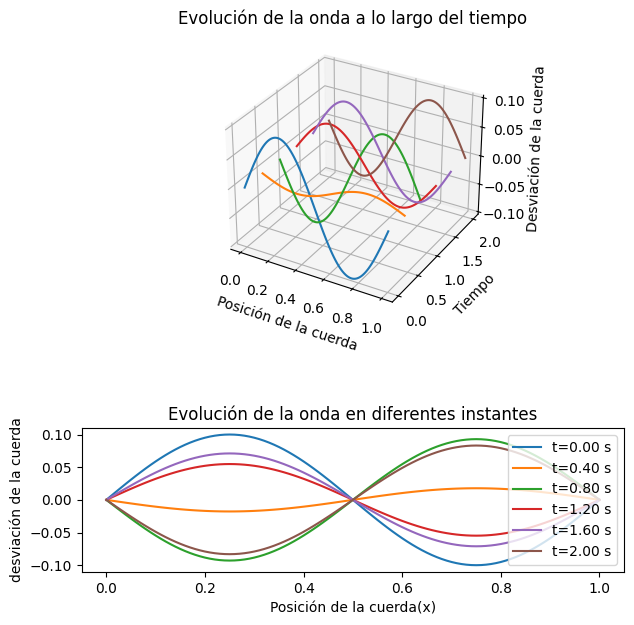

In [ ]:
from matplotlib import gridspec

# establece formato de los gráficos
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         width_ratios=[1], wspace=0.5,
                         hspace=0.5, height_ratios=[2, 1])

fig1 = plt.figure(figsize=(7, 7))
ax1 = fig1.add_subplot(spec[0], projection="3d")

# ejes
x = np.linspace(0, L, Nx)
t = np.linspace(0, tf, Nt)

# grafico de múltiples líneas en el tiempo
for m in range(0, Nt, int(Nt/5)):
    ax1.plot(x, t[m] * np.ones_like(x), psi[m, :])

# etiquetas varias a incluir luego
ax1.set_xlabel("Posición de la cuerda")
ax1.set_ylabel("Tiempo")
ax1.set_zlabel("Desviación de la cuerda")
ax1.set_title("Evolución de la onda a lo largo del tiempo")

ax2 = fig1.add_subplot(spec[1])
for m in range(0, Nt, int(Nt / 5)):  # Tomar 5 fotos
    ax2.plot(x, psi[m, :], label=f"t={t[m]:.2f} s")
ax2.set_xlabel('Posición de la cuerda(x)')
ax2.set_ylabel('desviación de la cuerda')
ax2.set_title('Evolución de la onda en diferentes instantes')
ax2.legend()
plt.show()


<font size=2><p align="justify">...mejor ilustrada a través de una animación, haciendo uso de la clase <tt>animation.FuncAnimation</tt> de Matplotlib:



Step 1000/1000 (100.00%) completed. 
Animation complete!!!


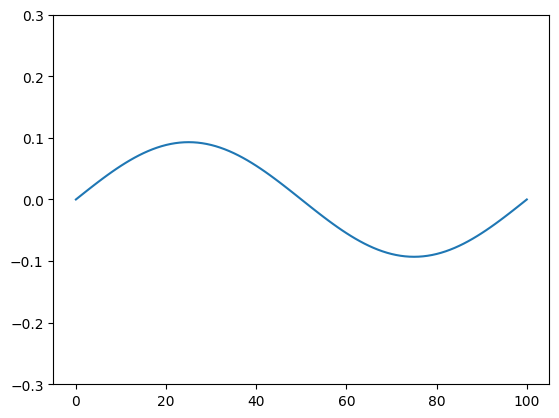

In [ ]:
# animación
num_steps = 1000

funcion = psi

figura, axx = plt.subplots()
line = axx.plot(funcion[0, :])[0]
axx.set_ylim(-0.3, 0.3)

def init():

    line.set_ydata(funcion[0, :])
    return line,

def update(frame):

    line.set_ydata(funcion[frame, :])
    print(f"Step {frame+1}/{num_steps} ({((frame+1)*100/num_steps):.2f}%) completed. ", end="\r")

    if (frame + 1) == num_steps:
        print()
        print("Animation complete!!!")
    return line,

ani = FuncAnimation(figura, update, frames=num_steps, init_func=init, blit=True, interval=20)

HTML(ani.to_html5_video())

## <font face="Georgia" size=3><b>4. Comparación de diferentes materiales</b></p>

<font size=2><p align="justify">Una vez probada la simulación y corroborado el funcionamiento de ésta, procedemos a realizar una prueba más avanzada, usando cuerdas de distintos materiales con disttintas tensiones y densidades lineales de masa:

Material | Tensión (N) | Densidad lineal (kg/m)
---------|-------------|-----------------------
Nylon    | 0.01        | 50
Acero    | 0.02        | 100
Kevlar   | 0.015       | 80
Algodón  | 0.03        | 30

<br>

<font size=2><p align="justify">Estos valores influencian el valor de la constante $c=\sqrt{\frac{T}{μ}}$, y por tanto cambian el valor de $α$ y la forma en que la onda evoluciona en el tiempo:

In [ ]:
# comparación para distintos materiales

# posible a futuro: generalizar a una cantidad indeterminada de materiales (usando un dataframe de pandas?)

# listas de valores
T_ = [50, 100, 80, 30] #tensiones
mu_ = [0.01, 0.02, 0.015, 0.03] #densidades
c_ = [np.sqrt(a/b) for a, b in zip(T_, mu_)] #constante c
alpha_ = [(z*dt/dx)**2 for z in c_] #constante alfa

nombres = ["Nylon", "Acero", "Kevlar", "Algodon"]

# arreglos
u_ = [np.zeros((Nt, Nx)) for i in range(4)] #crea 4 arrays en blanco

# condiciones de borde
for arr in u_: #fija los bordes de las cuerdas
    arr[:, 0] = 0
    arr[:, -1] = 0


# condición inicial
for arr in u_:
    for i in range(1, Nx-1):
        arr[0, i] = A * np.sin((n * np.pi * i*(dx)) / L)

    arr[1, :] = arr[0, :] # en el paso 1, la posición es igual al paso 0
    # esto es para que no falten datos en la simulación
    # (empieza desde el paso 1)

# simulación para la propagación de la onda
for n, arr in enumerate(u_): #para cada línea n en el array u_
    for j in range(1, Nt - 1):
        for i in range(1, Nx - 1):
            arr[j + 1, i] = alpha_[n]*(arr[j, i+1] + arr[j, i-1] - 2*arr[j,i]) - arr[j-1, i] + 2*arr[j,i]

Step 1000/1000 (100.00%) completed. 
Animation complete!!!


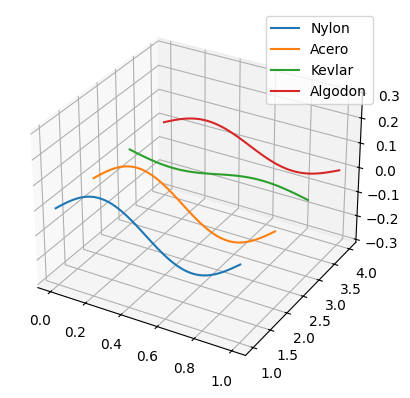

In [ ]:

# ejes
x = np.linspace(0, L, Nx)

# animación
num_steps = 1000


figura1 = plt.figure()
ax = figura1.add_subplot(111, projection="3d")

#crea las 4 líneas iniciales
# (n+1)*np.ones_like(x) le asigna un número de 1 a 4 a cada línea
# y le da dimensiones similares a x a este intervalo
# tal que el gráfico funcione
lines = [ax.plot(x, (n+1)*np.ones_like(x), arr[0, :],
                 label=nombres[n])[0] for n, arr in enumerate(u_)]

plt.legend()
ax.set_zlim(-0.3, 0.3)
ax.set_xlabel("Posición en la cuerda")
ax.set_zlabel("Amplitud de la cuerda")

ax.yaxis.set_ticklabels([])

#función inicializadora, no hace nada especial
#ya que inicializamos las líneas fuera de ésta
def init():

    return lines

def update(frame):

    for n, arr in enumerate(u_):
        lines[n].set_data_3d(x, (n+1)*np.ones_like(x), arr[frame, :])

    print(f"Step {frame+1}/{num_steps} ({((frame+1)*100/num_steps):.2f}%) completed. ", end="\r")

    if (frame + 1) == num_steps:
        print()
        print("Animation complete!!!")
    return lines

ani = FuncAnimation(figura1, update, frames=num_steps, init_func=init, blit=True, interval=20)

HTML(ani.to_html5_video())


## <font face="Georgia" size=3><b>5. Solución bajo diferentes condiciones iniciales</b></p>

<font size=2><p align="justify">Finalmente, procedemos a probar la ecuación de ondas con un caso inicial particular: dos ondas, con distintas amplitudes y constantes de onda, obedeciendo a la siguiente condición inicial para $t=0$ en todo $x$:<br><br>
$$
u(x,0)=A_1\exp(-\frac{(x-x_1)^2}{2σ_1^2}) + A_2\exp(-\frac{(x-x_2)^2}{2σ_2^2})
$$

<br>

<font size=2><p align="justify"> Donde:

* <font size=2>$A_1=1m$ y $A_2=0.7m$ son las amplitudes respectivas de cada pulso;
* $x_1=0.2m$ y $x_2=0.8m$ son las posiciones del centro de cada pulso;
* $σ_1=0.05m$ y $σ_2=0.08m$ son los anchos de cada pulso.

<font size=2><p align="justify">Adicionalmente, cada pulso tiene su propia constante $c_n$ que da el valor de otra, $λ_n$:<br><br>
$$
λ_1 = (c_1\frac{Δt}{Δx})^2 \leq \frac{1}{2}
$$
<br>
$$
λ_2 = (c_2\frac{Δt}{Δx})^2 \leq \frac{1}{2}
$$

<font size=2><p align="justify">Los valores iniciales, así como los valores de $c_1$ y $c_2$ (tal que se cumplan las condiciones de estabilidad) los determinamos en código:



In [ ]:
# variables

A_1 = 1
A_2 = 0.7

dx = 0.01
dt = 5e-4

#se divide por el paso para que quede en la misma posición relativa en la simulación
SIGMA_1 = 0.05/dx
SIGMA_2 = 0.08/dx
x_1 = 0.2/dx
x_2 = 0.8/dx

c1 = 6
c2 = 40

LAMBDA_1 = (c1*dt/dx)**2
LAMBDA_2 = (c2*dt/dx)**2

print(f"Coeficientes (inicial): \nL_1 = {LAMBDA_1:.3f}; C_1 = {int(c1)} \nL_2 = {LAMBDA_2:.3f}; C_2 = {int(c2)}")

flag = False

if abs(LAMBDA_1) > 1/2:
    print("Coeficiente LAMBDA_1 excede borde de estabilidad (|L_1| > 1/2)!")
    flag = True
if abs(LAMBDA_2) > 1/2:
    print("Coeficiente LAMBDA_2 excede borde de estabilidad (|L_2| > 1/2)!")
    flag = True

# reajustar valores de c1 y c2 para que den mejores coeficientes

if flag:
    c1 = np.sqrt(0.3)*dx/dt # c1 tal que LAMBDA_1 = 0.2
    c2 = np.sqrt(0.5)*dx/dt # c2 tal que LAMBDA_2 = 0.8

    LAMBDA_1 = (c1*dt/dx)**2
    LAMBDA_2 = (c2*dt/dx)**2

    print(f"Coeficientes (ajustado): \nL_1 = {LAMBDA_1:.1f}; C_1 = {c1:.3f} \nL_2 = {LAMBDA_2:.1f}; C_2 = {c2:.3f}")


Coeficientes (inicial): 
L_1 = 0.090; C_1 = 6 
L_2 = 4.000; C_2 = 40
Coeficiente LAMBDA_2 excede borde de estabilidad (|L_2| > 1/2)!
Coeficientes (ajustado): 
L_1 = 0.3; C_1 = 10.954 
L_2 = 0.5; C_2 = 14.142


<font size=2><p align="justify">Para el paso de tiempo, obtuvimos la siguiente ecuación discretizada:<br><br>
$$
  u_i^{n+1} = 2u_i^n-u_i^{n-1}\space +\space λ_1[u_{i+1}^n+u_{i-1}^n-2u_i^n]\space +\space λ_2[u_{i+1}^n+u_{i-1}^n-2u_i^n]
$$

<font size=2><p align="justify">Complementamos esto con una versión interpolada para el paso $n=1$, con tal que la simulación tenga todos los datos iniciales necesarios para correr de forma correcta:<br><br>
$$
  u_i^1 = u_i^0\space +\space\frac{λ_1}{2}[u_{i+1}^0+u_{i-1}^0-2u_i^0]\space +\space\frac{λ_2}{2}[u_{i+1}^0+u_{i-1}^0-2u_i^0]
$$

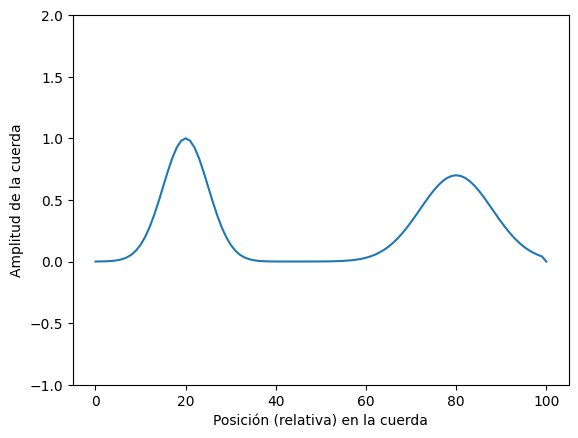

In [ ]:
# construcción de la onda

L = 1
tf = 5

Nx = int(L / dx) + 1
Nt = int(tf / dt) + 1

u = np.zeros((Nt, Nx))

#condición inicial
for k in range(1, Nx-1):

    var_1 = -((k - x_1)**2)/(2*SIGMA_1**2)
    var_2 = -((k - x_2)**2)/(2*SIGMA_2**2)

    u[0, k] = A_1 * np.exp(var_1) + A_2 * np.exp(var_2)

for k in range(1, Nx-1):

    u[1, k] = u[0, k] + (LAMBDA_1/2)*(u[0, k+1] - 2*u[0, k] + u[0, k-1]) + (LAMBDA_2/2)*(u[0, k+1] - 2*u[0, k] + u[0, k-1])

u[:, 0] = 0
u[:, -1] = 0

## función paso

def step(u: np.ndarray, n: int, i: int):
    return 2*u[n, i] - u[n-1, i] + (LAMBDA_1)*(u[n, i+1] - 2*u[n, i] + u[n, i-1]) + (LAMBDA_2)*(u[n, i+1] - 2*u[n, i] + u[n, i-1])

# simulación

for n in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        u[n+1, i] = step(u, n, i)

# gráfico
fig, ax = plt.subplots()
line = ax.plot(u[0, :])[0]
ax.set_ylim(-1, 2)
ax.set_xlabel("Posición (relativa) en la cuerda")
ax.set_ylabel("Amplitud de la cuerda")

plt.show()


## <font face="Georgia" size=3><b>6. Animaciones</b></p>

<font size=2><p align="justify">Para finalizar, procedemos a animar, de la misma forma que en los casos anteriores, para mostrar la curiosa evolución de los pulsos en el tiempo:

Step 300/300 (100.00%) completed.
Animation complete!


<Figure size 640x480 with 0 Axes>

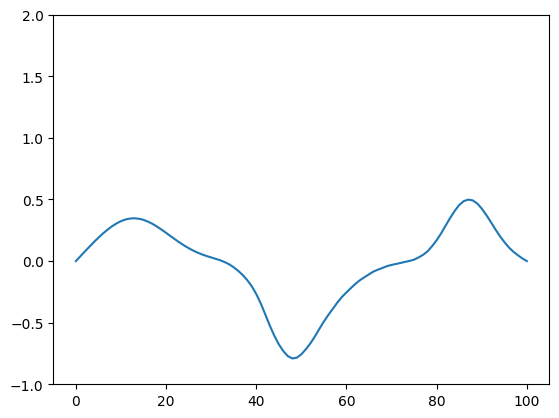

In [ ]:
plt.clf()

num_steps = 300

fig, ax = plt.subplots()
line = ax.plot(u[0, :])[0]
ax.set_ylim(-1, 2)

def init():

    line.set_ydata(u[0, :])
    return line,

def update(frame):

    line.set_ydata(u[frame, :])

    print(f"Step {frame+1}/{num_steps} ({((frame+1)*100/num_steps):.2f}%) completed.", end="\r")

    if (frame + 1) == num_steps:
        print()
        print("Animation complete!")

    return line,

ani = FuncAnimation(fig, update, frames=num_steps, init_func=init, blit=True, interval=20)

HTML(ani.to_html5_video())